In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [8]:
# practice with linear regression
# loading data set
data = pd.read_csv("housing.csv")

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# data exploration
data.info() # to get the information about the data (to see if any null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# data cleaning (to remove null values)
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split
# split the data into train and test
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# data visualization
train_data = x_train.join(y_train)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13107,-121.37,38.42,18.0,2643.0,502.0,1755.0,541.0,3.3281,INLAND,91200.0
8622,-118.38,33.87,33.0,1993.0,371.0,918.0,361.0,6.9021,<1H OCEAN,337600.0
4632,-118.31,34.06,34.0,2470.0,1197.0,2326.0,1055.0,1.9038,<1H OCEAN,325000.0
7574,-118.21,33.89,45.0,1211.0,234.0,1128.0,261.0,3.4792,<1H OCEAN,110700.0
3146,-118.51,35.16,7.0,4371.0,727.0,1932.0,654.0,4.6250,INLAND,136800.0
...,...,...,...,...,...,...,...,...,...,...
2067,-119.80,36.65,34.0,2263.0,423.0,1184.0,407.0,1.7692,INLAND,74200.0
8946,-118.45,34.02,41.0,2956.0,700.0,1212.0,645.0,3.4583,<1H OCEAN,421900.0
14250,-117.09,32.72,33.0,1096.0,240.0,716.0,224.0,1.6944,NEAR OCEAN,111800.0
5187,-118.27,33.93,41.0,570.0,135.0,466.0,121.0,2.6458,<1H OCEAN,91300.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

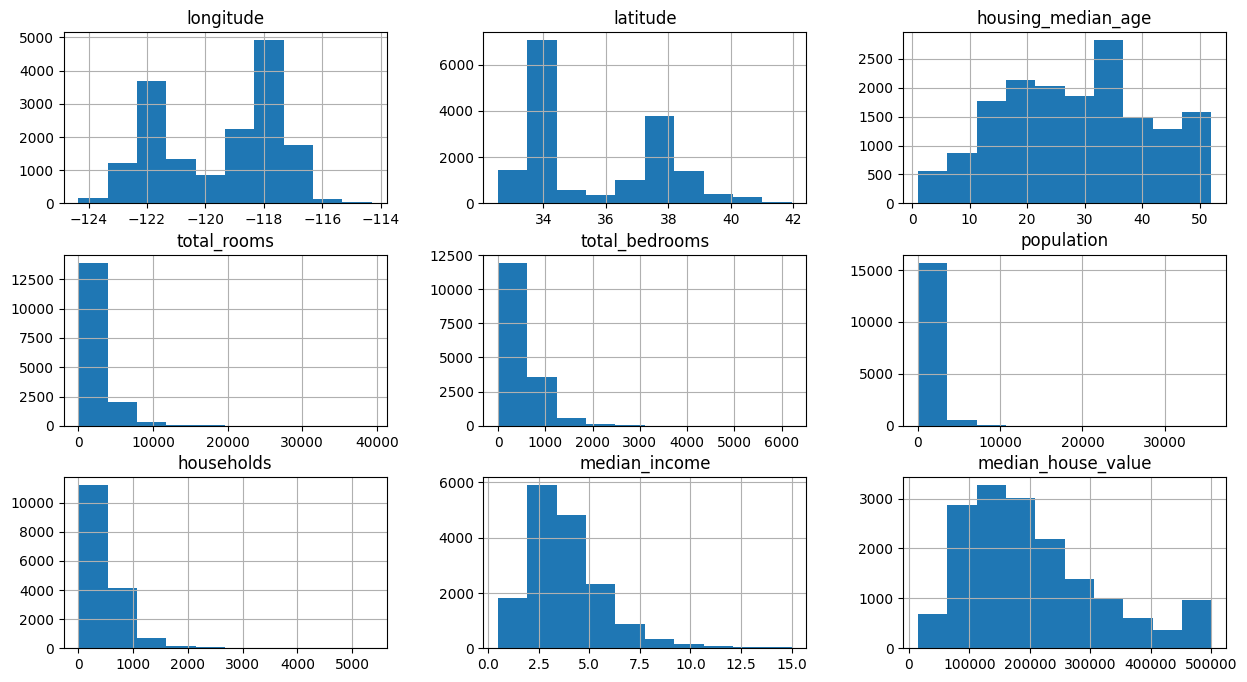

In [21]:
train_data.hist(figsize=(15,8))

/var/folders/ph/hr1c00051wgd0bp1pl3fp4wr0000gn/T/ipykernel_90178/1989966331.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<AxesSubplot: >

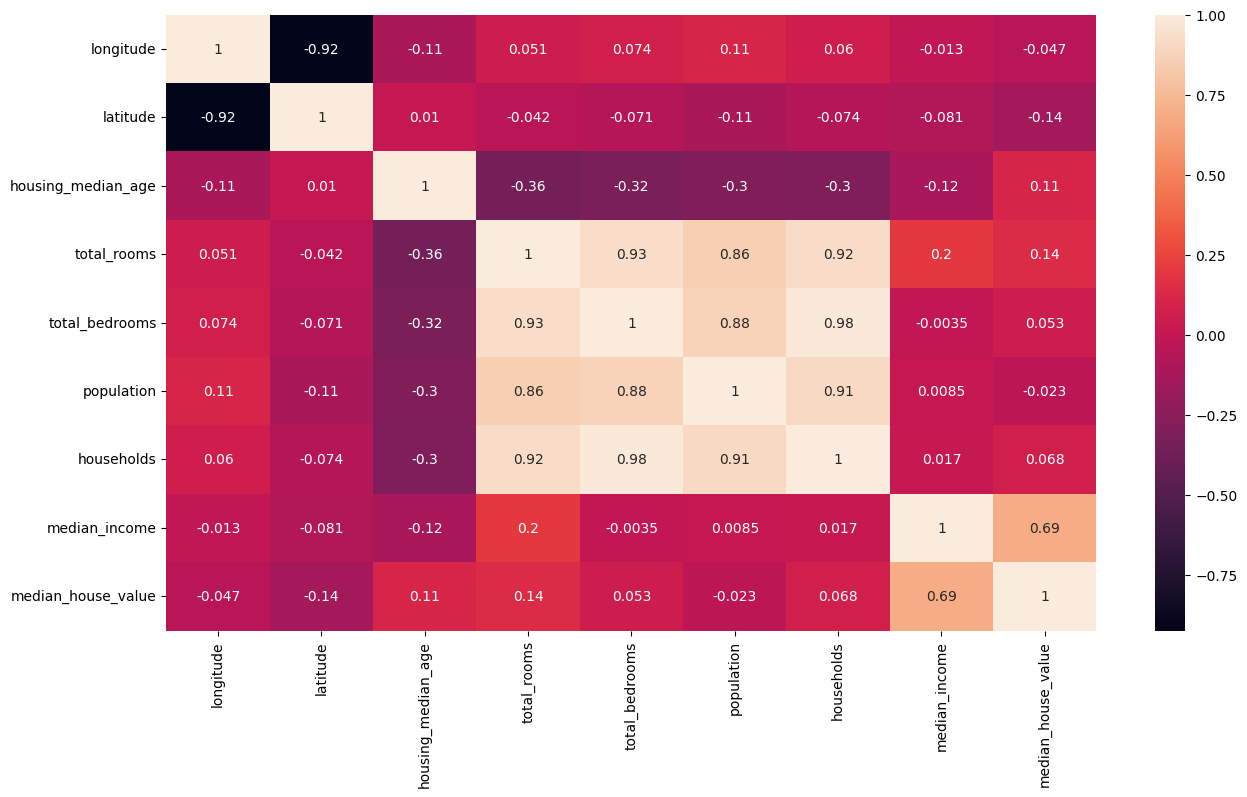

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [30]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

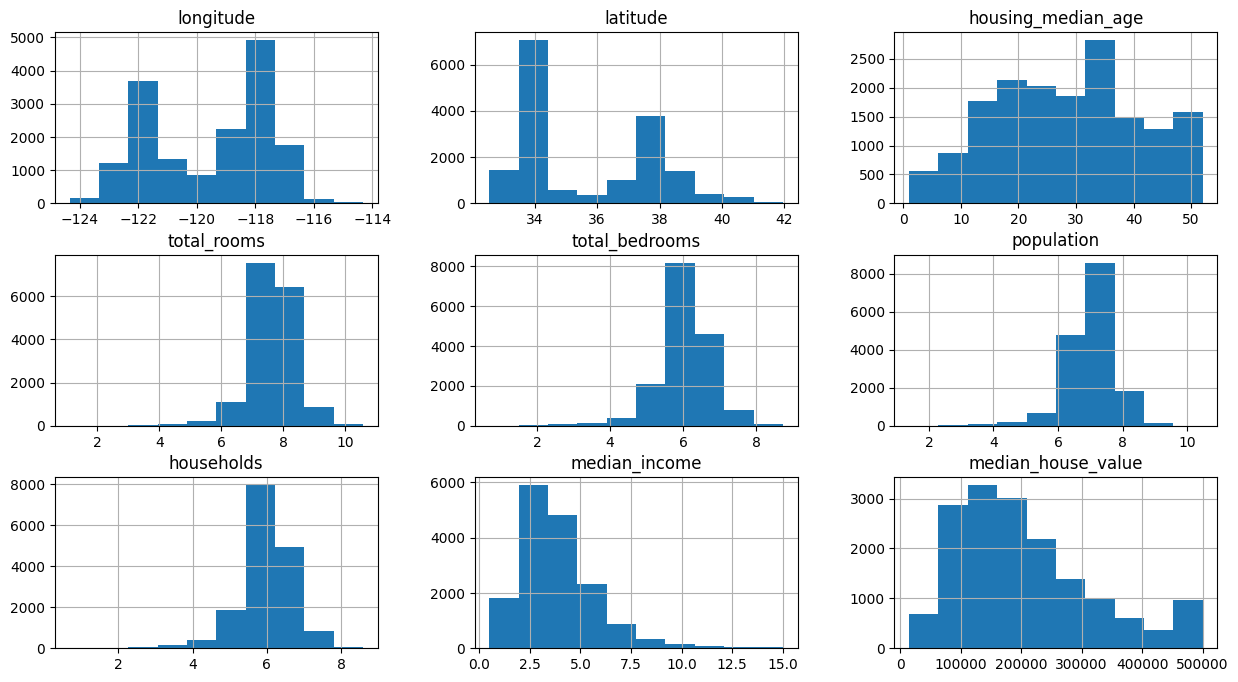

In [31]:
train_data.hist(figsize=(15,8))

In [36]:
# convert categorical data to numerical data
test_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

KeyError: 'ocean_proximity'

In [37]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13107,-121.37,38.42,18.0,7.880048,6.220590,7.470794,6.295266,3.3281,91200.0,0,1,0,0,0
8622,-118.38,33.87,33.0,7.597898,5.918894,6.823286,5.891644,6.9021,337600.0,1,0,0,0,0
4632,-118.31,34.06,34.0,7.812378,7.088409,7.752335,6.962243,1.9038,325000.0,1,0,0,0,0
7574,-118.21,33.89,45.0,7.100027,5.459586,7.029088,5.568345,3.4792,110700.0,1,0,0,0,0
3146,-118.51,35.16,7.0,8.382976,6.590301,7.566828,6.484635,4.6250,136800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-119.80,36.65,34.0,7.724888,6.049733,7.077498,6.011267,1.7692,74200.0,0,1,0,0,0
8946,-118.45,34.02,41.0,7.991931,6.552508,7.100852,6.470800,3.4583,421900.0,1,0,0,0,0
14250,-117.09,32.72,33.0,7.000334,5.484797,6.575076,5.416100,1.6944,111800.0,0,0,0,0,1
5187,-118.27,33.93,41.0,6.347389,4.912655,6.146329,4.804021,2.6458,91300.0,1,0,0,0,0


<AxesSubplot: >

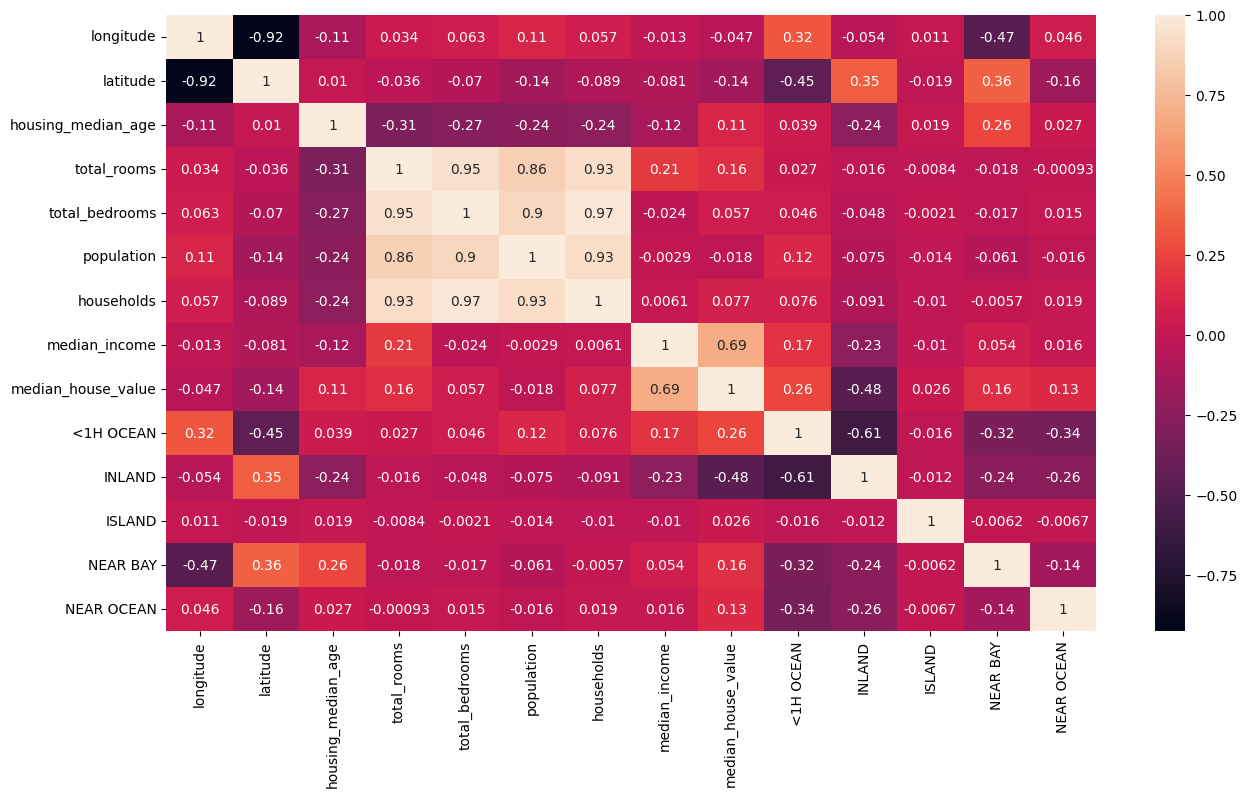

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(), annot=True)

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

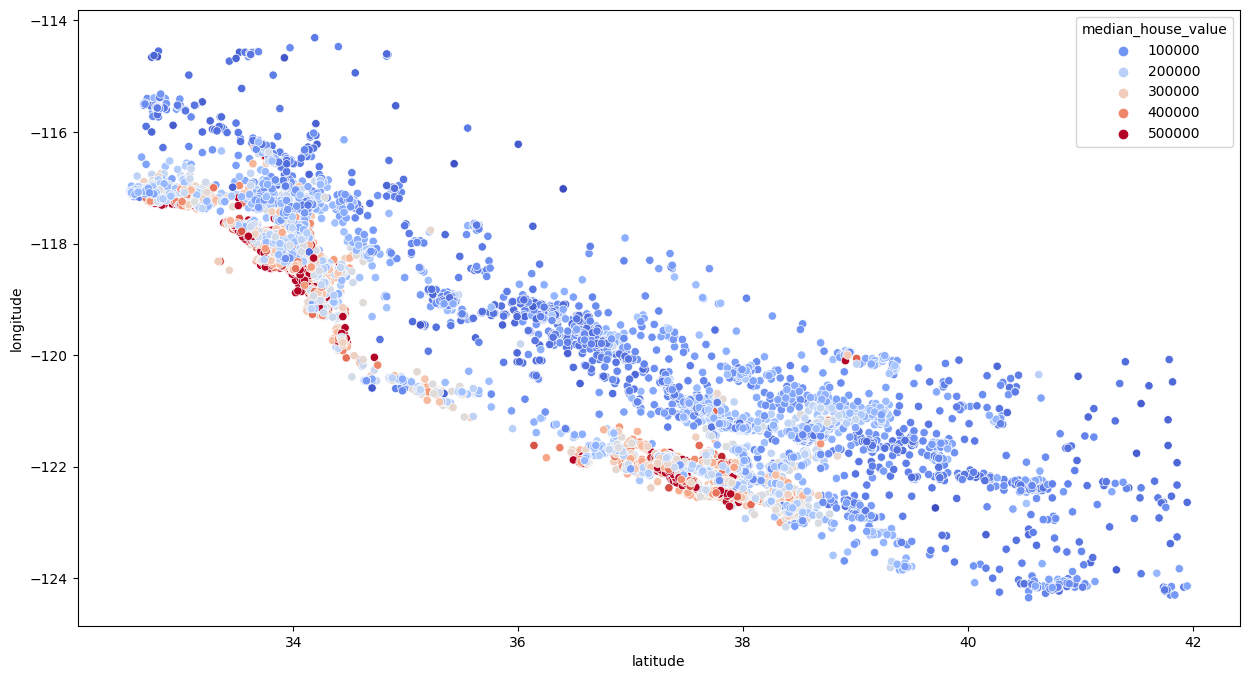

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=test_data, hue="median_house_value", palette="coolwarm")

In [42]:
# feature engineering to add new features to increaae the accuracy of the model
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

<AxesSubplot: >

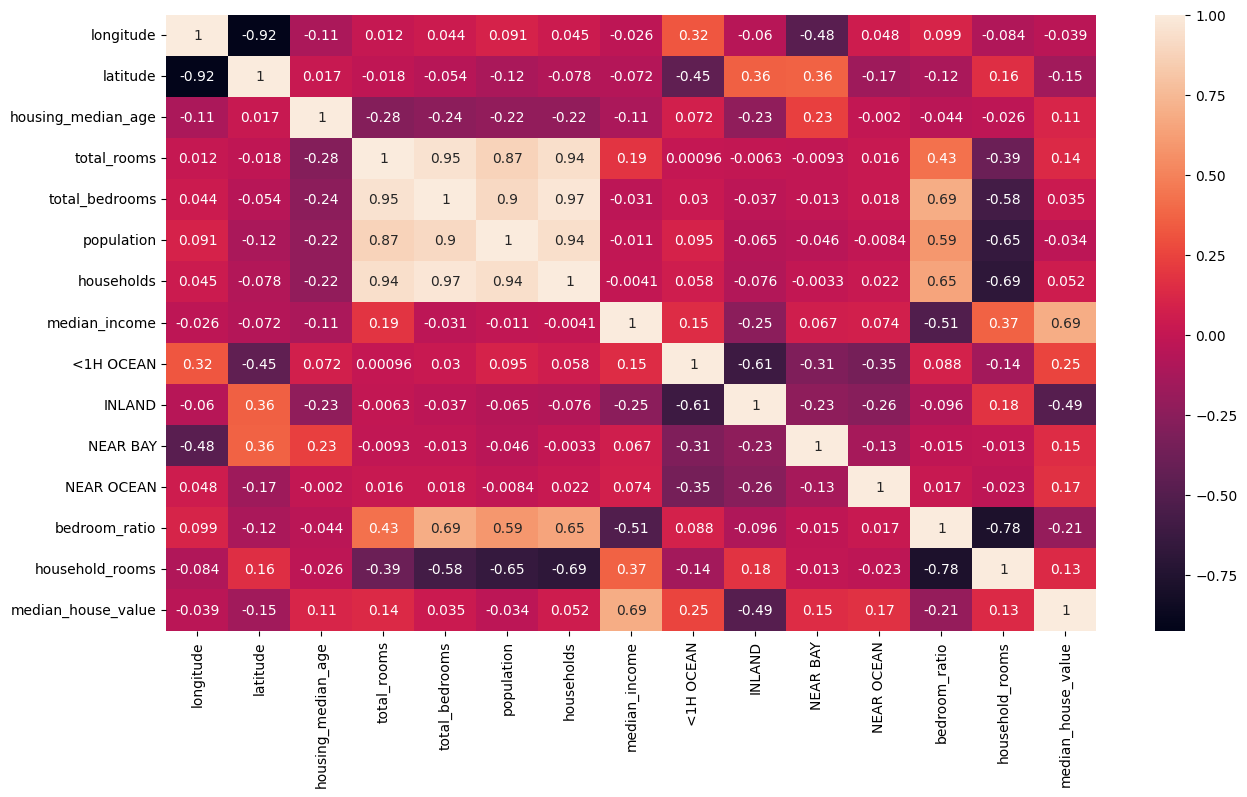

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(), annot=True)

In [79]:
# linear regression
from sklearn.linear_model import LinearRegression

# split into x & y again
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)


LinearRegression()

In [80]:
# testing model
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# feature engineering to add new features to increaae the accuracy of the model
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

KeyError: 'ocean_proximity'

In [81]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [82]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13107,-121.37,38.42,18.0,7.880048,6.220590,7.470794,6.295266,3.3281,91200.0,0,1,0,0,0.789410,1.251742
8622,-118.38,33.87,33.0,7.597898,5.918894,6.823286,5.891644,6.9021,337600.0,1,0,0,0,0.779017,1.289606
4632,-118.31,34.06,34.0,7.812378,7.088409,7.752335,6.962243,1.9038,325000.0,1,0,0,0,0.907330,1.122106
7574,-118.21,33.89,45.0,7.100027,5.459586,7.029088,5.568345,3.4792,110700.0,1,0,0,0,0.768953,1.275070
3146,-118.51,35.16,7.0,8.382976,6.590301,7.566828,6.484635,4.6250,136800.0,0,1,0,0,0.786153,1.292744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-119.80,36.65,34.0,7.724888,6.049733,7.077498,6.011267,1.7692,74200.0,0,1,0,0,0.783148,1.285068
8946,-118.45,34.02,41.0,7.991931,6.552508,7.100852,6.470800,3.4583,421900.0,1,0,0,0,0.819890,1.235076
14250,-117.09,32.72,33.0,7.000334,5.484797,6.575076,5.416100,1.6944,111800.0,0,0,0,1,0.783505,1.292505
5187,-118.27,33.93,41.0,6.347389,4.912655,6.146329,4.804021,2.6458,91300.0,1,0,0,0,0.773965,1.321266


In [83]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
19699,-121.62,39.09,21.0,2.185914,1.971013,2.104004,1.956941,3.8534,0,1,0,0,0.782139,1.299646,99700.0
3548,-118.61,34.25,16.0,2.304935,2.118407,2.226757,2.113927,5.5111,1,0,0,0,0.810977,1.239377,276600.0
18697,-122.38,40.58,34.0,2.096943,1.885703,1.981794,1.881095,1.6983,0,1,0,0,0.782915,1.284239,72600.0
5582,-118.30,33.82,35.0,2.117847,1.921600,2.084496,1.915445,2.6136,1,0,0,0,0.797444,1.263086,213600.0
2052,-119.73,36.72,15.0,2.165315,1.963565,2.089707,1.946112,2.0294,0,1,0,0,0.793625,1.285922,70400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,-121.89,39.76,15.0,2.325969,2.143457,2.244116,2.146316,3.0700,0,1,0,0,0.815113,1.222857,142600.0
13877,-117.31,34.43,16.0,2.255814,2.087821,2.202525,2.073635,1.6784,0,1,0,0,0.827259,1.228565,71900.0
3622,-118.45,34.23,15.0,2.267480,2.137428,2.244783,2.124229,2.3584,1,0,0,0,0.863959,1.174928,157600.0
794,-122.08,37.64,30.0,2.258571,2.096064,2.231134,2.081404,3.3479,0,0,1,0,0.832507,1.221459,182100.0


In [84]:
reg.score(x_test, y_test)

-0.41738004465118017